# Investigating the aperture flux of sextractor


In [1]:
# Read in the sextractor fluxes and ra, dec positions
import numpy as np
import pylab as plt
from zero_points_cdfs import zero_points_cdfs

cal_mag = -2.5*np.log10(100) + zero_points_cdfs.n964_band.mag_correct(1)
print(cal_mag)

ra, dec, fluxes = np.loadtxt('../correct_stacks/N964/n964.cat', usecols=(0, 1, -3), unpack=True)


24.07754533739207


In [2]:
# setting up astropy photometry
import astropy.units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from photutils.aperture import SkyCircularAperture
from photutils.aperture import aperture_photometry

positions = SkyCoord(ra=ra* u.deg, dec=dec * u.deg,)
aperture = SkyCircularAperture(positions, r=1. * u.arcsec)

hdu = fits.open('../correct_stacks/N964/background_check_n964.fits')
data = hdu[0].data
wcs = WCS(hdu[0].header)

pix_aperture = aperture.to_pixel(wcs)
phot_table = aperture_photometry(data, pix_aperture)

Text(0, 0.5, 'Photutil fluxes')

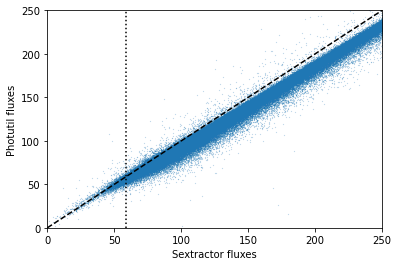

In [3]:
# Compare the two.

phot_flux = phot_table['aperture_sum']


plt.scatter(fluxes, phot_flux, s=0.01)
plt.plot(np.linspace(0, 250), np.linspace(0,250), ls='--', color='k')
plt.xlim(0, 250)
plt.axvline(59,ls=':', color='k')
plt.ylim(0, 250)
plt.xlabel("Sextractor fluxes")
plt.ylabel("Photutil fluxes")

/tmp/ipykernel_25067/284013058.py:4: RuntimeWarning: invalid value encountered in log10
  return -2.5 * np.log10(flux)


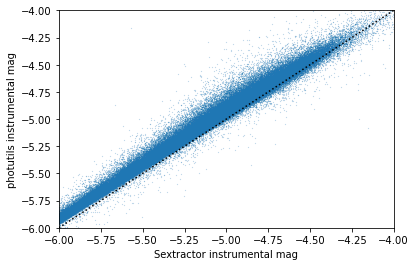

In [4]:
# Comparing the instrumental mags

def convert(flux):
    return -2.5 * np.log10(flux)

inst_mags = convert(fluxes)
phot_mags = convert(phot_flux)

plt.scatter(inst_mags, phot_mags, s=0.01)
plt.xlabel('Sextractor instrumental mag')
plt.ylabel('photutils instrumental mag')
line = np.linspace(-6,-4)
plt.xlim(-6, -4)
plt.ylim(-6,-4)
plt.plot(line, line, ls=':', color='k')